In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Dataset Link :https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

Dataset Deatils:
Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file.
The structure of the csv file is:

    the first row contains column headers ['names', 'labels','1','2',…..'784']
    The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
    The 'labels' column contains characters such as '@','E' or '+'
    The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style

This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects. 

In [12]:
data = pd.read_csv(r"C:\Users\vishn\Downloads\archive(1)\94_character_TMNIST.csv")

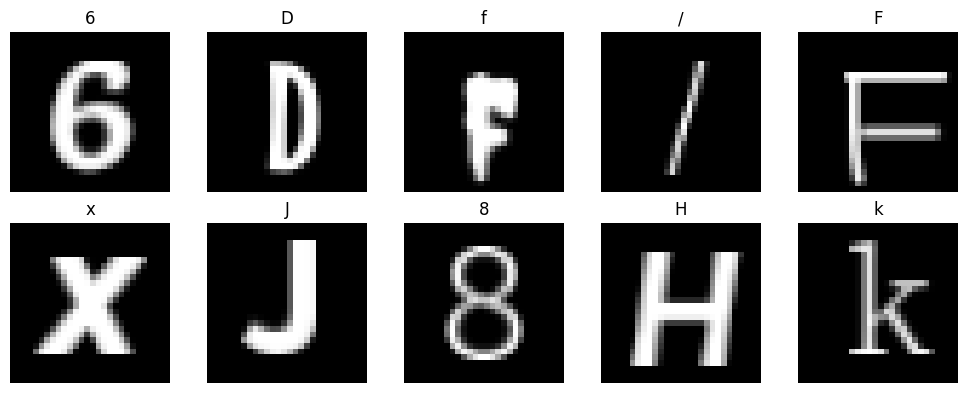

In [27]:
head = data.head(10)

plt.figure(figsize=(10, 4))
for i in range(10):
    pixels = head.iloc[i, 2:].values.astype(np.uint8).reshape((28, 28))
    
    label = head.iloc[i, 1]
    font_name = head.iloc[i, 0]
    
    plt.subplot(2, 5, i+1)
    plt.imshow(pixels, cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Activation Function : Sigmoid

Epochs : 20

Weight Updation Rule : Learning Rate * Xi
                            ,where Xi is the input value

In [15]:
X = data.iloc[:, 2:].values / 255.0 
y = data['labels'].values


label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

num_features = X_train.shape[1]
num_classes = len(np.unique(y_numeric))
weights = np.random.randn(num_features, num_classes)
bias = np.zeros(num_classes)
learning_rate = 0.01

def activation(z):
    return 1 / (1 + np.exp(-z))


for epoch in range(20): 
    for i in range(X_train.shape[0]):
        z = np.dot(X_train[i], weights) + bias
        y_pred = activation(z)
        
        if y_pred != y_train[i]:
            weights[:, y_train[i]] += learning_rate * X_train[i]
            weights[:, y_pred] -= learning_rate * X_train[i]

z_test = np.dot(X_test, weights) + bias
y_test_pred = activation(z_test)

accuracy = np.mean(y_test_pred == y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

Test accuracy: 80.86%


In [20]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Confusion Matrix:
[[542   0   0 ...   3   0   0]
 [  1 520   0 ...   0   0   1]
 [  0   0 552 ...   0   0   1]
 ...
 [  6   0   0 ... 504   0   0]
 [  3   0   1 ...   0 577   0]
 [  0   1   0 ...   0   0 556]]
Classification Report:
              precision    recall  f1-score   support

           !       0.88      0.90      0.89       602
           "       0.88      0.94      0.91       556
           #       0.92      0.95      0.93       579
           $       0.94      0.90      0.92       583
           %       0.94      0.91      0.92       617
           &       0.89      0.88      0.89       566
           '       0.76      0.74      0.75       617
           (       0.96      0.93      0.94       587
           )       0.92      0.93      0.92       591
           *       0.80      0.89      0.84       624
           +       0.98      0.96      0.97       626
           ,       0.75      0.87      0.80       583
           -       0.68      0.94      0.79       634
          

In [25]:
y_test_actual_labels = label_encoder.inverse_transform(y_test)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

results_df = pd.DataFrame({
    'Actual': y_test_actual_labels,
    'Predicted': y_test_pred_labels,
    'Correct': y_test_actual_labels == y_test_pred_labels
})
print(results_df.head(10))

  Actual Predicted  Correct
0      &         &     True
1      '         '     True
2      i         i     True
3      v         V    False
4      /         /     True
5      _         _     True
6      S         d    False
7      g         ,    False
8      ,         ,     True
9      h         H    False


Save the trained weights so you dont have to train the model again and again.

In [26]:
np.savez('perceptron_model_weights.npz', weights=weights, bias=bias)